# Comparing Models to Predict March Madness Rankings


March Madness, also known as the NCAA Division I Men's Basketball Tournament happens annually in the month of March. Depending on which teams performed the best in the season, the top 32 are selected to compete in the tournament and play each other in a bracket for the winners trophy. Although March Madness 2018 is already over, our team wanted to see which model would do a better job at predicting team rankings/winners. We decided to look at the Elo Model as well as use simple logistic regression with features we extracted in order to find a trend. 

### Scraping the Data

In order to scrape data, we used www.sports-reference.com/cbb (cbb = college basketball). We utilized the BeautifulSoup library to extract the features that we thought we would need for both models. In the following code the features extracted are in the _featuresWanted_ set. A typical page that we would scrape from looks like the following: 

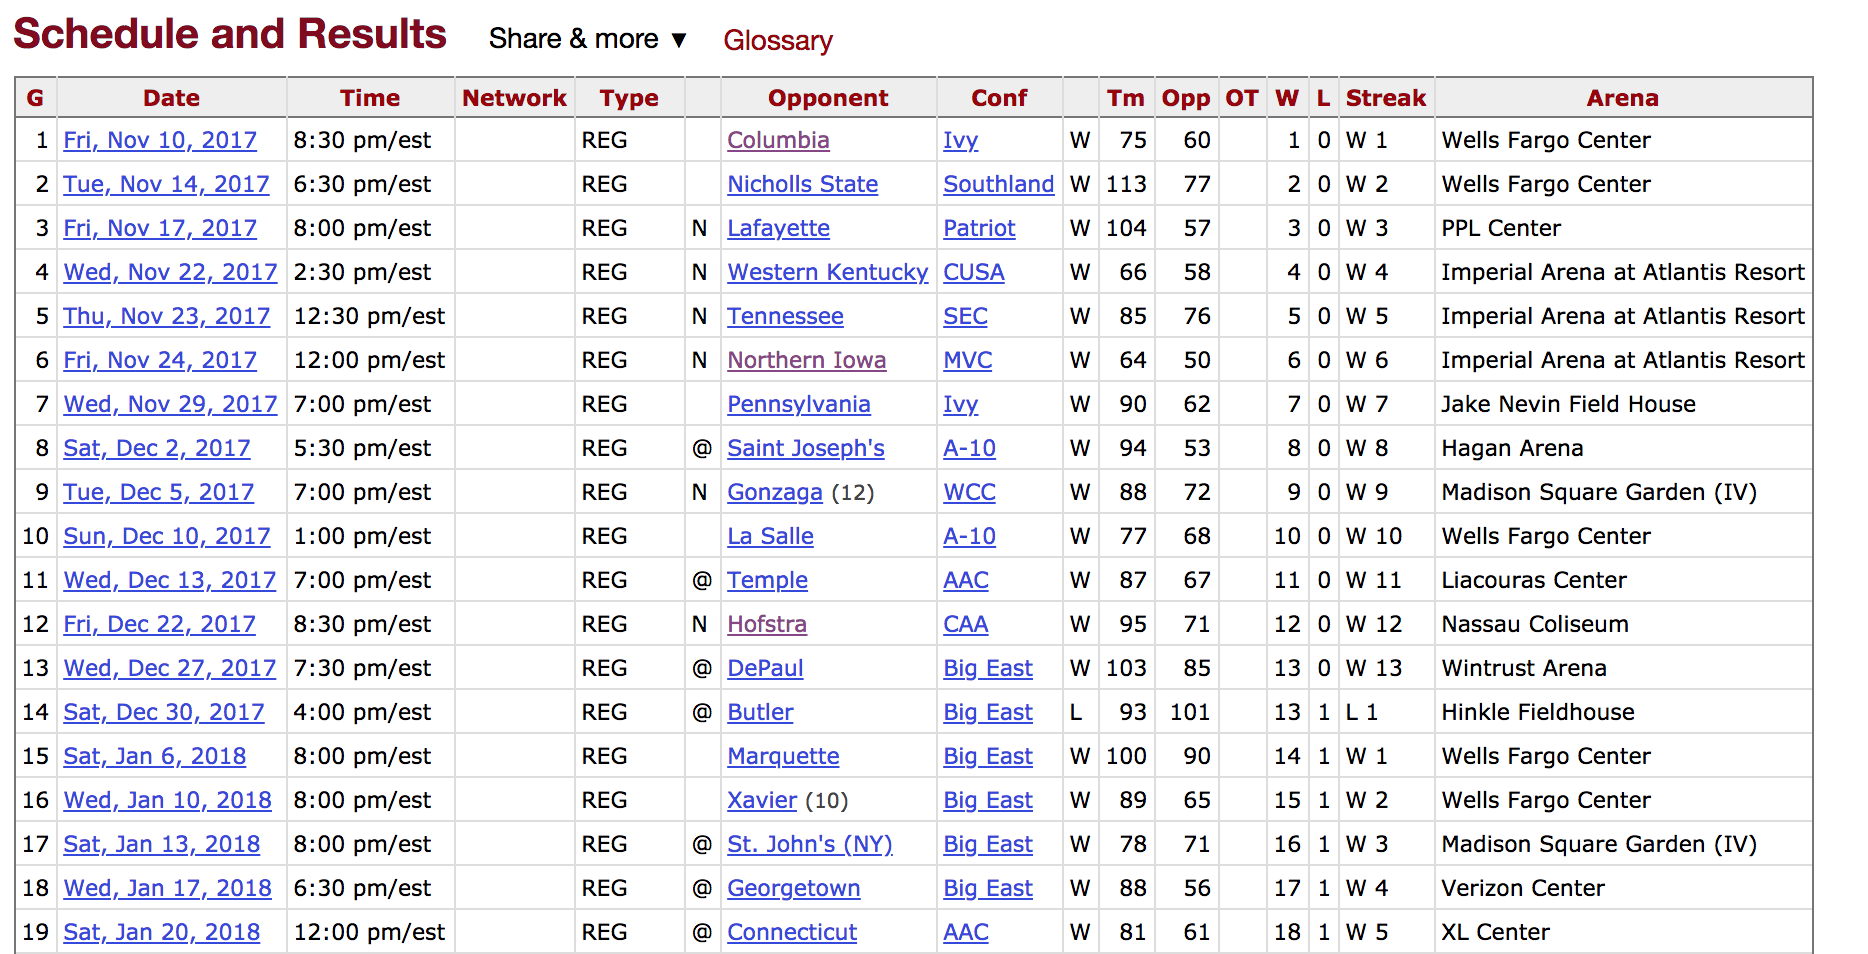



This data displays Villanova's game history for the year 2018 [Found here](https://www.sports-reference.com/cbb/schools/villanova/2018-schedule.html). We used Beautiful Soup to gather all the table data and format it in a data frame. Because the scraping usually takes ~10 minutes, the code was run once and put into a csv file, which we later used to do our data analysis. 


In [14]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


def getSchools():
    url = "https://www.sports-reference.com/cbb/seasons/2018-school-stats.html"
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count  = 0
    table = soup.find("tbody")
    school_set = set()
    for row in table.findAll('td', {"data-stat": "school_name"}):
        for a in row.find_all('a', href=True):
            link = a['href'].strip()
            name = link[13:].split("/")[0]
            school_set.add(name)
            
    return school_set

def getDfs():
    school_set = getSchools()
    dfs = []
    final_df=pd.DataFrame()
    for school in school_set: 
        url = "https://www.sports-reference.com/cbb/schools/" + school + "/2018-schedule.html"
        page = urlopen(url).read()
        soup = BeautifulSoup(page)
        count = 0 
        pre_df = dict()
        school_set = getSchools()
        table = soup.find("tbody")
        featuresWanted =  {'opp_name', 'pts', 'opp_pts', 
                           'game_location','game_result','overtimes','wins','losses', 'date_game'} #add more features here!!

        rows = table.findChildren(['tr'])
        for row in rows:
            if (row.find('th', {"scope":"row"}) != None):

                for f in featuresWanted:
                    cell = row.find("td",{"data-stat": f})

                    a = cell.text.strip().encode()
                    text=a.decode("utf-8")
                    if f in pre_df:
                        pre_df[f].append(text)
                    else:
                        pre_df[f]=[text]
            
        df = pd.DataFrame.from_dict(pre_df)
        df["opp_name"]= df["opp_name"].apply(lambda row: (row.split("(")[0]).rstrip())
        df["school_name"]=school
        final_df=pd.concat([final_df,df])
    return final_df


def csvDump():
    df=getDfs()
    df.to_csv("new_data.csv")
    
    
csvDump()



/Users/sumedhamehta/Desktop/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/sumedhamehta/Desktop/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


                  opp_name opp_pts pts
0                   Mercer      79  88
1             Gardner-Webb      65  68
2           William & Mary      64  75
3                 Nebraska      59  68
4            West Virginia      83  45
5               St. John's      46  43
6                 Missouri      62  59
7                  Alabama      62  65
8                 Southern      60  76
9   Southeastern Louisiana      53  61
10                 Stetson      55  74
11    South Carolina State      64  89
12      Southern Methodist      56  51
13           East Carolina      39  59
14                 Memphis      56  65
15                  Temple      39  60
16             Connecticut      62  53
17              Cincinnati      49  38
18           South Florida      69  71
19           Wichita State      81  62
20             Connecticut      61  70
21                 Houston      69  65
22              Cincinnati      77  40
23                 Memphis      64  68
24           South Florid

                 opp_name opp_pts  pts
0                  Howard      75   84
1           Florida State      87   67
2                 Hampton      57   65
3                   Rider      67   65
4                  Xavier      83   64
5            Kansas State      67   59
6            Morgan State      66   73
7                  Temple      67   71
8               Princeton      60   71
9              Penn State      74   54
10                  Miami      59   50
11          New Hampshire      64   68
12                Harvard      48   58
13         Saint Joseph's      64   70
14               Duquesne      69   52
15           Rhode Island      81   60
16               Davidson      72   45
17               Richmond      78   68
18           George Mason      68   80
19  Virginia Commonwealth      87   63
20        St. Bonaventure      70   52
21               Duquesne      75   73
22               Davidson      87   58
23               La Salle      69   80
24           George Mason

                     opp_name opp_pts pts
0                Old Dominion      57  54
1             Frostburg State      45  89
2                      Loyola      72  95
3            Florida Atlantic      52  76
4                Pennsylvania      71  79
5            Georgia Southern      67  70
6                  St. Mary's      57  90
7                    La Salle      60  67
8                   Manhattan      55  56
9                Morgan State      78  82
10  Maryland-Baltimore County      65  78
11                    Oakland      97  86
12                 Pittsburgh      63  59
13      College of Charleston      73  62
14                       Elon      75  72
15  North Carolina-Wilmington      71  89
16      College of Charleston      62  73
17                    Hofstra      76  73
18             William & Mary      73  99
19                     Drexel      68  90
20  North Carolina-Wilmington      73  71
21             William & Mary      82  96
22                       Elon     

                     opp_name opp_pts pts
0         Bowling Green State      78  69
1                     Arcadia      81  95
2                     Houston      80  84
3                      Mercer      78  59
4                       Drake      90  88
5                        NJIT      65  53
6                   Lafayette      67  68
7                       Rider      77  89
8                    La Salle      70  72
9               Robert Morris      74  60
10                     Temple      63  60
11                 Quinnipiac      71  72
12                     Loyola      66  62
13                       Elon      90  75
14  North Carolina-Wilmington     107  87
15      College of Charleston      82  87
16             William & Mary      85  63
17                   Delaware      72  66
18                    Hofstra      91  86
19                     Towson      90  68
20              James Madison      75  73
21                       Elon      79  83
22               Northeastern     

                    opp_name opp_pts pts
0   North Carolina-Asheville      60  84
1                     Nevada      88  81
2                 Holy Cross      66  88
3                 Seton Hall      74  75
4                   Virginia      70  55
5                      Brown      62  86
6                 Providence      68  75
7                    Alabama      68  64
8      College of Charleston      62  68
9                       Iona      74  80
10        Florida Gulf Coast      60  80
11              George Mason      64  83
12                  La Salle      62  74
13         George Washington      60  81
14               Saint Louis      65  72
15           St. Bonaventure      73  87
16             Massachusetts      51  73
17                    Dayton      74  88
18                   Fordham      58  78
19                  Duquesne      58  61
20             Massachusetts      83  85
21     Virginia Commonwealth      68  81
22                  Davidson      59  72
23              

                     opp_name opp_pts pts
0                    American      45  83
1        Missouri-Kansas City      51  72
2                   UC-Irvine      49  71
3            Northern Arizona      58  80
4               Arizona State      92  90
5           George Washington      59  67
6                Oral Roberts      68  77
7                  Vanderbilt      79  84
8      South Carolina Upstate      49  86
9                       Tulsa      61  54
10   Southeast Missouri State      71  89
11           Washington State      65  68
12                 Iowa State      75  91
13              West Virginia      77  69
14                 Texas Tech      74  58
15             Oklahoma State      82  86
16                     Kansas      73  72
17                   Oklahoma      69  87
18            Texas Christian      68  73
19                     Baylor      83  90
20                    Georgia      51  56
21                     Kansas      70  56
22              West Virginia     

               opp_name opp_pts  pts
0              Stanford      89   80
1              UC-Davis      62   58
2                Nevada      89   74
3             Air Force      71   83
4   Arkansas-Pine Bluff      69   78
5           Texas State      85   78
6              Canisius      58   80
7          UC-Riverside      55   57
8   Arkansas-Fort Smith      68  105
9              UC-Davis      71   67
10              Wyoming      86   72
11     Nevada-Las Vegas      81   76
12        Arizona State     104   65
13              Gonzaga      81   48
14     Loyola Marymount      82   88
15         Saint Mary's      74   56
16        Brigham Young      66   67
17            San Diego      70   74
18             Portland      54   66
19           Pepperdine      78   92
20         Saint Mary's      72   69
21        San Francisco      69   67
22        Brigham Young      80   65
23          Santa Clara      45   63
24           Pepperdine      72   81
25              Gonzaga      71   61
2

              opp_name opp_pts pts
0              Alabama      82  70
1          Little Rock      62  70
2          New Orleans      52  63
3    Northern Kentucky      74  76
4   Alabama-Birmingham      71  56
5               Mercer      81  83
6              Samford      64  65
7               Bryant      72  90
8               Albany      58  67
9           Louisville      81  72
10               Siena      66  70
11              Loyola      71  83
12     Louisiana State      71  61
13          Cincinnati      82  48
14     Central Florida      65  56
15               Tulsa      67  76
16              Tulane      89  96
17              Temple      72  75
18         Connecticut      49  73
19               Tulsa      64  51
20          Cincinnati      62  48
21       South Florida      74  86
22       East Carolina      88  85
23       Wichita State      85  65
24     Central Florida      68  64
25  Southern Methodist      67  70
26              Tulane      63  68
27             Houst

               opp_name opp_pts pts
0           Alabama A&M      53  61
1               Clemson      81  76
2                Dayton      79  65
3         Indiana State      94  96
4      Mount St. Mary's      77  96
5                  Iona      93  88
6          Coppin State      37  80
7              Maryland      87  62
8      Western Kentucky      84  89
9              Marshall      99  96
10         Prairie View      65  84
11    Northwestern Ohio      58  65
12     Central Michigan      75  50
13    Northern Illinois      68  78
14           Ball State      75  68
15           Kent State      70  69
16               Toledo      91  57
17     Eastern Michigan      66  72
18                Akron      71  68
19              Buffalo      73  66
20  Bowling Green State      66  50
21     Central Michigan     101  98
22                Akron      75  99
23     Western Michigan      69  60
24               Toledo      82  74
25                Miami      87  92
26           Kent State     

                    opp_name opp_pts  pts
0       Missouri-Kansas City      57  109
1      College of Charleston      63   81
2   University of California      82   92
3                  Marquette      66   80
4                 Notre Dame      67   66
5             Savannah State      66  112
6                     Baylor      62   69
7         South Dakota State      85   95
8             Oklahoma State      66   78
9                   Oklahoma      91   83
10            Arkansas State      80   89
11        Florida Gulf Coast      65   75
12               Connecticut      62   72
13                   Houston      63   81
14             South Florida      57   95
15             East Carolina      60   95
16                     Tulsa      69   72
17        Southern Methodist      83   78
18                   Houston      73   59
19           Central Florida      62   81
20                     Tulsa      71   90
21                    Temple      81   79
22                   Memphis      

               opp_name opp_pts  pts
0   Northern New Mexico      76  147
1                 Omaha      71  103
2      New Mexico State      75   56
3        Tennessee Tech     104   96
4       Texas Christian      69   67
5              Maryland      80   65
6            Evansville      59   78
7         Texas-El Paso      88   76
8              Colorado      75   57
9      New Mexico State      65   62
10              Arizona      89   73
11                 Rice      69   78
12         Prairie View      78   87
13            Air Force      58   87
14               Nevada      77   74
15          Boise State      90   62
16       San Jose State      47   80
17              Wyoming      66   75
18         Fresno State      89   80
19     Nevada-Las Vegas      81   85
20      San Diego State      75   79
21       Colorado State      65   80
22           Utah State      89   80
23       San Jose State      68   71
24          Boise State      73   71
25            Air Force     100   92
2

                     opp_name opp_pts pts
0                    Kentucky      73  69
1                     Bradley      64  65
2            Coastal Carolina      67  80
3           Northern Kentucky      64  66
4             Maine-Fort Kent      54  90
5                        Yale      73  79
6                    Richmond      65  71
7                    Bucknell      81  77
8                   Marquette      91  81
9                Northeastern      71  67
10                      Siena      57  81
11            St. Bonaventure      81  79
12                 Quinnipiac      73  80
13                    Harvard      56  62
14       Massachusetts-Lowell      77  88
15  Maryland-Baltimore County      56  71
16                  Dartmouth      78  91
17                Stony Brook      62  73
18                      Maine      62  83
19              New Hampshire      56  67
20                   Hartford      53  76
21                     Albany      50  61
22                 Binghamton     

                  opp_name opp_pts pts
0                 La Salle      61  40
1             Northwestern      75  66
2             Sacred Heart      61  70
3            South Alabama      54  49
4                Lafayette      82  86
5      Fairleigh Dickinson      53  77
6                     Elon      71  65
7          Houston Baptist      74  76
8               Seton Hall      84  61
9   Long Island University      56  71
10             St. Francis      68  71
11               Fairfield      70  61
12                Monmouth      64  77
13                    Iona      73  69
14              Quinnipiac      58  84
15                Canisius      70  58
16                 Niagara      73  70
17                   Rider      88  84
18               Manhattan      68  57
19                   Rider      63  60
20                   Siena      59  57
21                 Niagara      52  58
22                Canisius      73  58
23                  Marist      66  70
24                    Ion

                   opp_name opp_pts pts
0          Loyola Marymount      80  85
1             Brigham Young      75  89
2                   Alabama      77  76
3          Western Carolina      65  89
4                   Niagara      90  95
5              Texas-Dallas      53  73
6                      Rice      49  69
7               North Texas      60  65
8             Northern Iowa      62  58
9        Florida Gulf Coast      85  78
10  Texas-Rio Grande Valley      65  86
11                Creighton      90  81
12                 Cal Poly      56  77
13         Coastal Carolina      90  65
14        Appalachian State      80  76
15                     Troy      76  86
16            South Alabama      67  91
17              Little Rock      77  65
18           Arkansas State      71  97
19                Louisiana      77  65
20         Louisiana-Monroe      55  71
21            Georgia State      81  75
22         Georgia Southern      74  59
23        Appalachian State      77  89


                 opp_name opp_pts  pts
0                Monmouth      79   78
1                Arkansas     101   73
2          North Carolina      93   81
3                Maryland      80   78
4                   Siena      92  115
5              Ball State      83   87
6             Stony Brook      76   85
7          Saint Joseph's      83   70
8                 Vermont      77   81
9            Northeastern      82   64
10  Virginia Commonwealth      85   79
11               Richmond      78   86
12               La Salle      81   88
13               American      55   84
14      Boston University      84   79
15                   Army      66   83
16              Lafayette      75   80
17                 Lehigh      65   78
18                Colgate      51   63
19                 Loyola      70   78
20             Holy Cross      56   77
21                   Navy      67   87
22      Boston University      79   91
23                   Army      71   83
24              Lafayette

                    opp_name opp_pts pts
0        San Diego Christian      52  91
1              Arizona State      90  68
2              McNeese State      52  83
3           Eastern Illinois      63  94
4                    Georgia      68  75
5           Sacramento State      52  89
6           Washington State      93  86
7                  San Diego      57  66
8                    Bradley      52  75
9   University of California      63  62
10                   Gonzaga      70  72
11                   Wyoming      82  69
12                Utah State      59  79
13            Colorado State      68  77
14            San Jose State      49  85
15               Boise State      83  80
16              Fresno State      77  73
17                New Mexico      79  75
18            Colorado State      78  97
19          Nevada-Las Vegas      88  78
20                 Air Force      50  81
21              Fresno State      79  61
22                    Nevada      83  58
23              

                    opp_name opp_pts  pts
0                  Minnesota      92   77
1                      Allen      66   85
2                    Georgia      74   65
3        Charleston Southern      82   72
4                      Paine      59   79
5        Bowling Green State      83   74
6          Abilene Christian      78   88
7                   Campbell      93   74
8   North Carolina-Asheville      82   70
9               Gardner-Webb      87   66
10              Kansas State      86   49
11                    Denver      84   69
12        Jacksonville State      77   61
13           Coastal Georgia      75   83
14                 Creighton     116   62
15          North Greenville      59   80
16      Missouri-Kansas City      79   77
17                      NJIT      98   87
18        Florida Gulf Coast      75   58
19                   Stetson      87   69
20              Jacksonville      85   91
21             North Florida     100   80
22                  Lipscomb      

                       opp_name opp_pts  pts
0                South Carolina      73   52
1              Washington & Lee      66  103
2      University of California      79   65
3          Bob Jones University      65   96
4                 North Florida      83   86
5                    Texas Tech      79   56
6      North Carolina-Asheville      85   65
7              Coastal Carolina      81   87
8                  Georgia Tech      60   63
9               Johnson & Wales      45  104
10                   High Point      57   70
11               North Carolina      75   79
12    North Carolina-Greensboro      71   67
13  Virginia Military Institute      53   92
14                      Citadel      92  109
15                      Harvard      62   63
16                       Furman      70   79
17                      Samford      89   93
18                  Chattanooga      67   71
19  Virginia Military Institute      46   63
20         East Tennessee State      75   62
21        

               opp_name opp_pts  pts
0     Northern Illinois      85   65
1              Lakeland      27   98
2     Mississippi State      77   68
3           Florida A&M      50   57
4               Stetson      83   71
5               Belmont      86   75
6      Eastern Illinois      57   59
7              Missouri     100   77
8         Indiana State      85   63
9    Wisconsin-Parkside      50   86
10             Rockford      64  108
11  Bowling Green State      81   78
12            Wisconsin      81   60
13        Detroit Mercy      83   95
14              Oakland      79   80
15                IUPUI      67   63
16      Cleveland State      80   79
17     Youngstown State      85   74
18     Illinois-Chicago      84   73
19                IUPUI      67   61
20            Milwaukee      92   99
21         Wright State      80   67
22    Northern Kentucky      77   65
23      Cleveland State      44   66
24     Youngstown State      67   85
25            Milwaukee      76   58
2

                       opp_name opp_pts  pts
0                    Seton Hall      90   68
1                    Penn State      81   57
2   Fairleigh Dickinson-Florham      49  111
3                          Kean      55   94
4                    Holy Cross      76   87
5                     Princeton      83   76
6                 Saint Peter's      77   53
7                          Iona      82   75
8                       Rutgers      92   54
9                          NJIT      71   68
10                     Maryland      75   50
11       Long Island University      71   82
12                 Sacred Heart      66   65
13    Central Connecticut State      77   81
14                       Wagner      73   65
15       Long Island University      90   85
16                Robert Morris      81   75
17    Central Connecticut State      66   65
18             Mount St. Mary's      72   73
19                  St. Francis      76   70
20                       Bryant      78   89
21        

                          opp_name opp_pts pts
0                       North Park      46  88
1                Trinity Christian      46  83
2   Southern Illinois-Edwardsville      69  94
3           Southeastern Louisiana      50  83
4                          Samford      67  88
5                       Kent State      67  77
6        North Carolina-Wilmington      70  79
7                       Utah State      65  72
8                           Purdue      80  50
9                       Ball State      71  70
10                    Northwestern      84  50
11                     Santa Clara      68  76
12                    UC-Riverside      73  60
13                   Indiana State      73  64
14                  Missouri State      67  50
15                         Bradley      80  71
16               Southern Illinois      72  83
17                           Drake      60  77
18                   Northern Iowa      81  76
19                  Missouri State      64  57
20           

                            opp_name opp_pts  pts
0                      Wichita State     109   57
1   Haskell Indian Nations Institute      59  110
2                       Kansas State      72   51
3                             Loyola      66   56
4                          Manhattan      63   74
5                   Georgia Southern      78   75
6                       Pennsylvania      68   65
7                   Tennessee-Martin      55   65
8                       South Dakota      82   63
9           Southeast Missouri State      91   87
10              North Carolina State      88   69
11                    Incarnate Word      77   73
12                  Central Michigan      92   86
13                South Dakota State      85   60
14                             Avila      58   89
15            South Carolina Upstate      77   79
16           Texas-Rio Grande Valley      73   61
17                       Utah Valley      95   59
18                           Seattle      77   75


                    opp_name opp_pts  pts
0           Central Arkansas      66  107
1   Texas A&M-Corpus Christi      46   70
2               Alcorn State      61   78
3                  Wisconsin      65   70
4                  Creighton      59   65
5                     Xavier      76   63
6              Wichita State      69   62
7          Sam Houston State      56   84
8                  Hillsdale      82  105
9             Texas Southern      68   99
10            Savannah State      86  118
11                  Southern      60   80
12                Texas Tech      77   53
13           Texas Christian      81   78
14                     Texas      60   69
15             West Virginia      57   54
16                Iowa State      75   65
17            Oklahoma State      60   76
18                    Kansas      70   67
19              Kansas State      90   83
20                   Florida      81   60
21                  Oklahoma      98   96
22                Iowa State      

                  opp_name opp_pts  pts
0                  Niagara      77   75
1            Jackson State      58   72
2   Maryland-Eastern Shore      48   96
3                 Maryland      61   63
4          Texas Christian      89   79
5                    Siena      55   75
6                  Buffalo      62   73
7                 Canisius      65   73
8                     Yale      67   75
9                  Vermont      79   81
10            Northeastern      65   84
11                Syracuse      57   60
12           Massachusetts      78   98
13                  Dayton      82   72
14          Saint Joseph's      85   78
15                 Fordham      61   77
16            Rhode Island      87   73
17                Davidson      83   73
18          Saint Joseph's      67   70
19       George Washington      52   70
20            George Mason      69   85
21                Duquesne      81   84
22             Saint Louis      56   79
23                Richmond      88   97


               opp_name opp_pts  pts
0                Dayton      78   77
1              Oklahoma     108   69
2           Stony Brook      76   87
3                Oregon      95   71
4              Bucknell      87   83
5         Indiana State      85   93
6          Oakland City      57   81
7                 IUPUI      64   83
8            Notre Dame      77   80
9            Valparaiso      70   71
10        North Florida      65   79
11        Jackson State      54   70
12          Florida A&M      54   75
13     Eastern Michigan      62   72
14              Buffalo      83   63
15                 Ohio      68   75
16     Western Michigan      73   58
17     Central Michigan      76   82
18                Miami      71   53
19           Kent State      88   80
20                Akron     106  111
21               Toledo      63   75
22     Eastern Michigan      58   41
23  Bowling Green State      56   59
24           Kent State      68   87
25                Akron      77   90
2

KeyboardInterrupt: 